# Spaceship Titanic

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### Framing the problem

The object of this task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic'c collision with the spacetime anomaly.

This is a classic classification task, wchich requires supervised, offline learning.

The performance should be measured as a precision score.

75% precision score would be a satisfactory result

### Getting the data

In [3]:
train_kaggle = pd.read_csv(r'datasets\spaceship-titanic\train.csv')
test_kaggle = pd.read_csv(r'datasets\spaceship-titanic\test.csv')

### Exploring the data

In [4]:
train_kaggle.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'RoomService'}>],
       [<AxesSubplot: title={'center': 'FoodCourt'}>,
        <AxesSubplot: title={'center': 'ShoppingMall'}>],
       [<AxesSubplot: title={'center': 'Spa'}>,
        <AxesSubplot: title={'center': 'VRDeck'}>]], dtype=object)

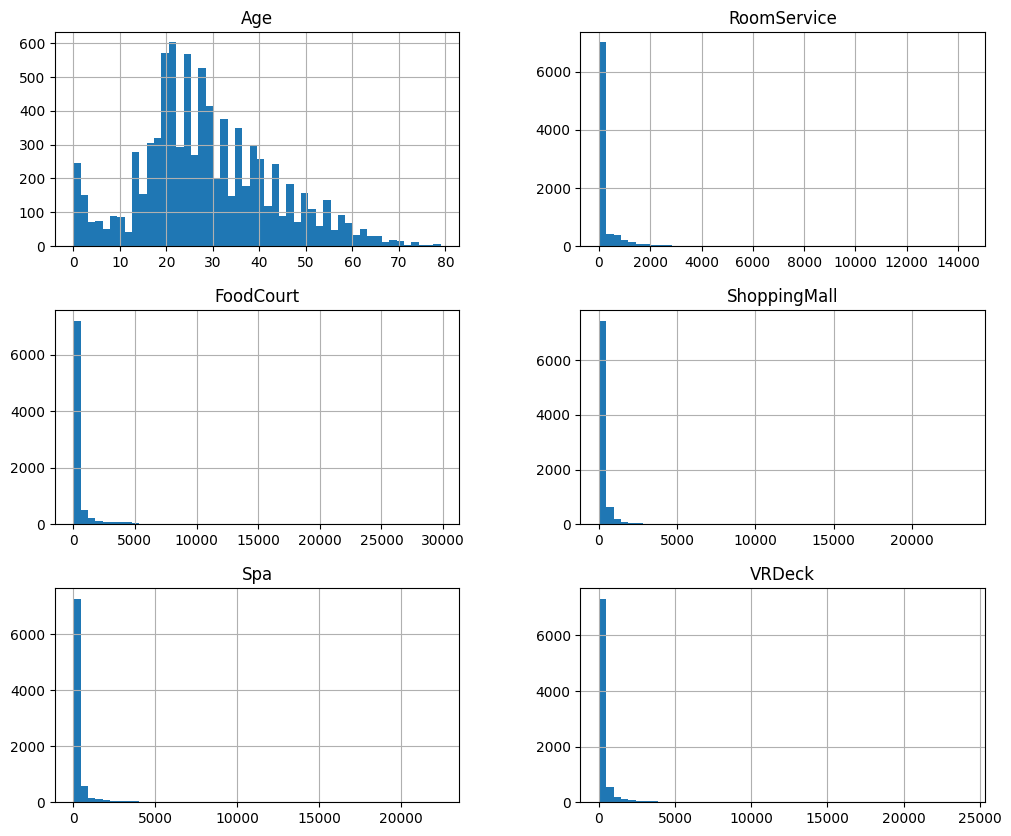

In [5]:
train_kaggle.hist(figsize=(12, 10), bins=50)

Passenger ID may be interesting. It is constructed as gggg_pp where gggg is a group the passenger is travelling with and the pp is a passenger number within this group.

Maybe it would be heplful to extract the group number and add it to the table

In [6]:
train_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train_kaggle.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
for category in train_kaggle.columns.values:
    missing_percent = train_kaggle[category].isnull().sum() / train_kaggle[category].size
    print(f"{category:15} {missing_percent:.2%}")

PassengerId     0.00%
HomePlanet      2.31%
CryoSleep       2.50%
Cabin           2.29%
Destination     2.09%
Age             2.06%
VIP             2.34%
RoomService     2.08%
FoodCourt       2.11%
ShoppingMall    2.39%
Spa             2.11%
VRDeck          2.16%
Name            2.30%
Transported     0.00%


In [9]:
train_kaggle['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [10]:
train_kaggle['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [11]:
train_kaggle['Cabin'].value_counts() 

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

Cabin seems to be irrelevant in the form it is now presented. Due to the fact that it is contructed as a deck/num/side, maybe I should transform it to 'deck', 'num' and 'side' columns.

In [12]:
train_kaggle['Destination'].value_counts() 

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [13]:
train_kaggle['RoomService'].value_counts() 

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck are the amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

I'm not sure now if it this information has any meaning in this task

In [14]:
train_kaggle['Cabin'].str.split('/', 2, expand=True)

C:\Users\m.olszanski\AppData\Local\Temp\ipykernel_15084\1169071137.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  train_kaggle['Cabin'].str.split('/', 2, expand=True)


,0,1,2
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
...,...,...,...
8688,A,98,P
8689,G,1499,S
8690,G,1500,S
8691,E,608,S


In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
import copy

class GroupAndSeatInfoAdder(BaseEstimator, TransformerMixin):
    '''Class to add a passenger Group info, as well as his Deck, Num and Side'''

    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_new = copy.deepcopy(X)
        X_new["group"] = X_new["PassengerId"].str.split('_', n=1, expand=True)[0]

        # try:
        X_new["deck"], X_new["num"], X_new["side"] =  X_new['Cabin'].str.split('/', n=2, expand=True)
        
        return X_new

attr_adder = GroupAndSeatInfoAdder()
train = attr_adder.transform(train_kaggle)
train = train.dropna(axis=0)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
 14  group         6606 non-null   object 
 15  deck          6606 non-null   int64  
 16  num           6606 non-null   int64  
 17  side          6606 non-null   int64  
dtypes: bool(1), float64(6), int6

In [19]:
corr = train.corr()
corr['Transported'].sort_values(ascending=False)

C:\Users\m.olszanski\AppData\Local\Temp\ipykernel_15084\4045656778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


Transported     1.000000
FoodCourt       0.055025
ShoppingMall    0.011602
Age            -0.082553
VRDeck         -0.207950
Spa            -0.219854
RoomService    -0.247291
deck                 NaN
num                  NaN
side                 NaN
Name: Transported, dtype: float64

In [ ]:
from sklearn.pipeline import Pipeline

transform_pipe = Pipeline([
    (),
    (),
])

In [18]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
y_pred = lasso_reg.predict()

SyntaxError: invalid syntax (114366494.py, line 4)